In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [32]:
D = 3 
N = 1e7
resdir = 'nsc-s1Ne7' #'nsc-s1' # 'nsc-s1Ne7'
s = 1.0
L = 1.0
n_perms = 10
nlist = [0.5, 1, 2, 5, 10, 20]
sclist = [0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99]
pctZeroMaxAngle_np = np.zeros((len(nlist), len(sclist), n_perms))
pctSmallMaxAngle_np = np.zeros((len(nlist), len(sclist), n_perms))
pctBigMaxAngle_np = np.zeros((len(nlist), len(sclist), n_perms))
numCivs_np = np.zeros((len(nlist), len(sclist), n_perms))
pctNumSeenZero_np = np.zeros((len(nlist), len(sclist), n_perms))

tdelta = 0.01
tintervals = np.arange(0, 1, tdelta)
n_tintervals = tintervals.shape[0]
tfreqs_np = np.zeros((len(nlist), len(sclist), n_tintervals))

for nix, n in enumerate(nlist):
    for scix,sc in enumerate(sclist):
        c = s / sc
        tfreqs_cur = np.zeros((n_perms, n_tintervals))

        for randix in range(n_perms):
            fout = (
                f"{resdir}/D={D}_n={float(n)}_N={N:.2e}_s={s:.1f}_"
                f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
            )
            a = pd.read_csv(fout)
            pctZeroMaxAngle_np[nix, scix, randix] = (a.MaxAngle == 0).mean()
            pctSmallMaxAngle_np[nix, scix, randix] = (
                (a.MaxAngle > 0) & (a.MaxAngle < 0.01)).mean()
            pctBigMaxAngle_np[nix, scix, randix] = (
                (a.MaxAngle > 0.01)).mean()
            numCivs_np[nix, scix, randix] = a.shape[0]
            for tix in range(tintervals.shape[0]):
                tmin = tintervals[tix]
                tmax = tmin + tdelta
                tfreqs_cur[randix,tix] = (
                    (a.NumberSeen == 0) & ((tmin < a.OriginTime) & (a.OriginTime < tmax))
                ).sum()
        tfreqs_np[nix,scix,:] = np.mean(tfreqs_cur, axis=0)
            
pctZeroMaxAngle = pd.DataFrame(
    data=np.mean(pctZeroMaxAngle_np, axis=2), columns=sclist, index=nlist)
pctSmallMaxAngle = pd.DataFrame(
    data=np.mean(pctSmallMaxAngle_np, axis=2), columns=sclist, index=nlist)
pctBigMaxAngle = pd.DataFrame(
    data=np.mean(pctBigMaxAngle_np, axis=2), columns=sclist, index=nlist)
numCivs = pd.DataFrame(
    data=np.mean(numCivs_np, axis=2), columns=sclist, index=nlist)

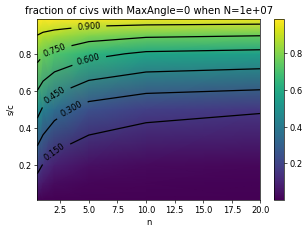

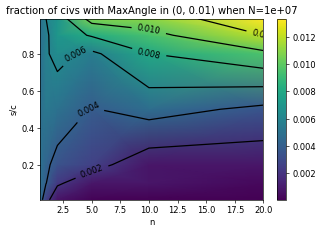

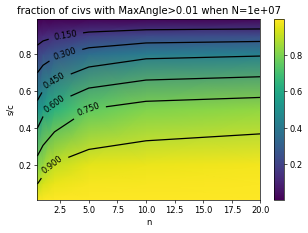

In [84]:
dpi = 60;
plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, pctZeroMaxAngle.values.T, shading='gouraud');
plt.colorbar();
cont = plt.contour(nlist, sclist, pctZeroMaxAngle.values.T, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');
plt.title(f'fraction of civs with MaxAngle=0 when N={N:g}');

plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, pctSmallMaxAngle.values.T, shading='gouraud')
plt.colorbar();
cont = plt.contour(nlist, sclist, pctSmallMaxAngle.values.T, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');
plt.title(f'fraction of civs with MaxAngle in (0, 0.01) when N={N:g}');

plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, pctBigMaxAngle.values.T, shading='gouraud')
plt.colorbar();
cont = plt.contour(nlist, sclist, pctBigMaxAngle.values.T, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');
plt.title(f'fraction of civs with MaxAngle>0.01 when N={N:g}');

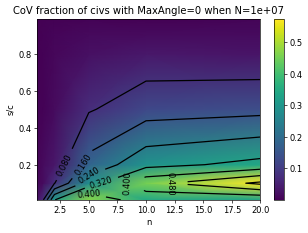

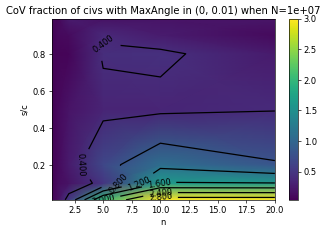

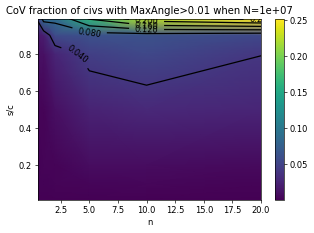

In [8]:
pctZeroMaxAngleStd = pd.DataFrame(
    data=np.std(pctZeroMaxAngle_np, axis=2), columns=sclist, index=nlist)
pctSmallMaxAngleStd = pd.DataFrame(
    data=np.std(pctSmallMaxAngle_np, axis=2), columns=sclist, index=nlist)
pctBigMaxAngleStd = pd.DataFrame(
    data=np.std(pctBigMaxAngle_np, axis=2), columns=sclist, index=nlist)
pctZeroMaxAngleCoV = pctZeroMaxAngleStd / pctZeroMaxAngle
pctSmallMaxAngleCoV = pctSmallMaxAngleStd / pctSmallMaxAngle
pctBigMaxAngleCoV = pctBigMaxAngleStd / pctBigMaxAngle

dpi = 60;
plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, pctZeroMaxAngleCoV.values.T, shading='gouraud');
plt.colorbar();
cont = plt.contour(nlist, sclist, pctZeroMaxAngleCoV.values.T, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');
plt.title(f'CoV fraction of civs with MaxAngle=0 when N={N:g}');

plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, pctSmallMaxAngleCoV.values.T, shading='gouraud')
plt.colorbar();
cont = plt.contour(nlist, sclist, pctSmallMaxAngleCoV.values.T, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');
plt.title(f'CoV fraction of civs with MaxAngle in (0, 0.01) when N={N:g}');

plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, pctBigMaxAngleCoV.values.T, shading='gouraud')
plt.colorbar();
cont = plt.contour(nlist, sclist, pctBigMaxAngleCoV.values.T, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s/c');
plt.title(f'CoV fraction of civs with MaxAngle>0.01 when N={N:g}');

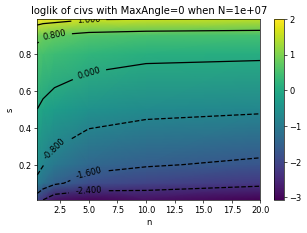

In [64]:
lik_np = pctZeroMaxAngle.values.T / (1-pctZeroMaxAngle.values.T)
log10lik_np = np.log10(lik_np)
log10lik = pd.DataFrame(data=log10lik_np, index=sclist, columns=nlist)
dpi = 60;
plt.figure(dpi=dpi)
plt.pcolormesh(nlist, sclist, log10lik, shading='gouraud');
plt.colorbar();
cont = plt.contour(nlist, sclist, log10lik, colors='k');
plt.gca().clabel(cont, inline=1, fontsize=10)
plt.xlabel('n');
plt.ylabel('s');
plt.title(f'loglik of civs with MaxAngle=0 when N={N:g}');

In [52]:
tfreqs_n = pd.DataFrame(data=tfreqs_np[nix,:,:], index=sclist, columns=tintervals) + 1e-8
tfreqs_n = tfreqs_n / tfreqs_n.sum(axis=0)
display(tfreqs_n) 
tfreqs_n[0.1] # s/c distribution at t=0.1

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
0.01,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.094340,0.028846,0.008,3.267974e-10,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
0.10,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.150943,0.153846,0.152,1.405229e-01,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
0.20,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.150943,0.163462,0.168,1.666667e-01,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
0.50,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.150943,0.163462,0.168,1.732026e-01,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
0.80,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.150943,0.163462,0.168,1.732026e-01,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
0.90,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.150943,0.163462,0.168,1.732026e-01,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
0.99,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.150943,0.163462,0.168,1.732026e-01,...,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


,0.5,1.0,2.0,5.0,10.0,20.0
0.01,1.165948e-13,5.777985e-14,2.382438e-14,2.608825e-14,3.834794e-14,2.948432e-14
0.10,3.885765e-04,2.878662e-04,1.599826e-04,1.001726e-04,7.469669e-05,5.774297e-05
0.20,1.683537e-03,1.410747e-03,9.179039e-04,6.353799e-04,4.623172e-04,3.755952e-04
0.50,8.400703e-03,7.906780e-03,6.565486e-03,6.068204e-03,4.669920e-03,4.758035e-03
0.80,3.394215e-02,3.370218e-02,3.097777e-02,3.344745e-02,2.774308e-02,3.162466e-02
0.90,7.760946e-02,7.840276e-02,7.489759e-02,8.088792e-02,6.958643e-02,7.866218e-02
0.99,8.779756e-01,8.782897e-01,8.864813e-01,8.788609e-01,8.974636e-01,8.845218e-01


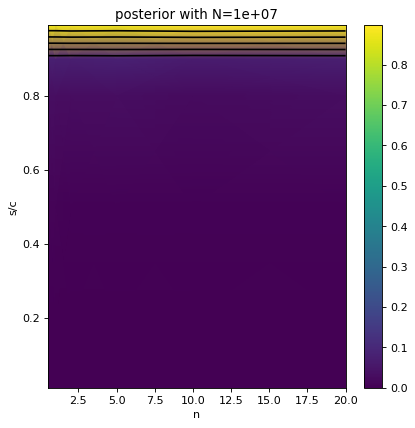

In [107]:
for tval in [0.1]:
    posterior_np = np.diag(tfreqs_n[tval].values) @ lik_np
    posterior_np = posterior_np / posterior_np.sum(axis=0)
    posterior = pd.DataFrame(data=posterior_np, index=log10lik.index, columns=log10lik.columns)
    display(posterior)
    dpi = 80;
    plt.figure(figsize=(6,6), dpi=dpi)
    plt.pcolormesh(nlist, sclist, posterior, shading='gouraud');
    plt.colorbar();
    cont = plt.contour(nlist, sclist, posterior, colors='k');
    #plt.gca().clabel(cont, inline=1, fontsize=10)
    plt.xlabel('n');
    plt.ylabel('s/c');
    plt.title(f'posterior with N={N:g}');

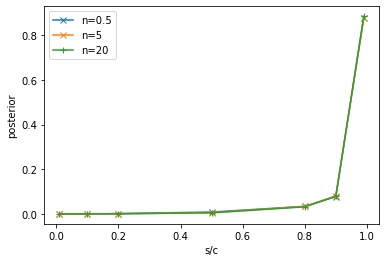

In [108]:
plt.plot(posterior.index, posterior[0.5], '-x');
plt.plot(posterior.index, posterior[5], '-x');
plt.plot(posterior.index, posterior[20], '-+');
plt.legend(['n=0.5', 'n=5', 'n=20']);
plt.ylabel('posterior');
plt.xlabel('s/c');